<a href="https://colab.research.google.com/github/ronita00/Python_Django/blob/main/Practice_Scikitlearn_Machie_Learning_with_Model_Naive_Bayes_and_Support_Vector_Machince_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
X, y = load_iris(return_X_y=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, nb_preds))

# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_preds))


Naive Bayes Accuracy: 0.9777777777777777

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

SVM Accuracy: 1.0

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



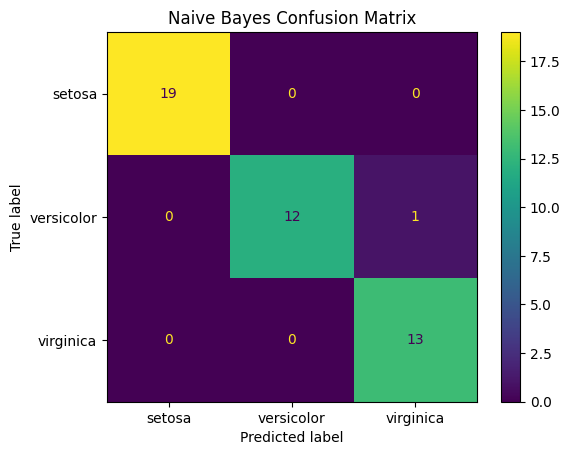

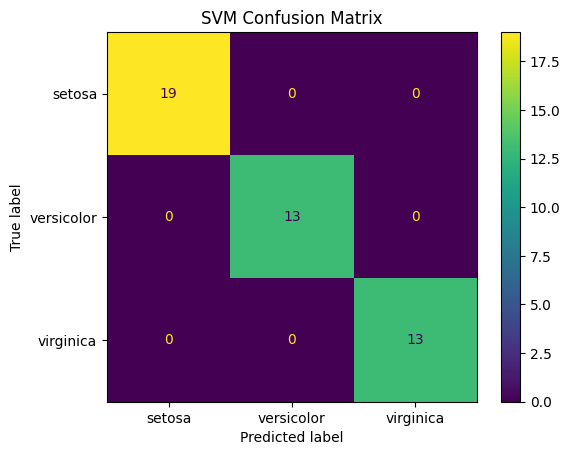

In [2]:
#A confusion matrix to visualize the classification results.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

# Confusion Matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_preds)
ConfusionMatrixDisplay(nb_cm, display_labels=load_iris().target_names).plot()
plt.title("Naive Bayes Confusion Matrix")
plt.show()

# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_preds)
ConfusionMatrixDisplay(svm_cm, display_labels=load_iris().target_names).plot()
plt.title("SVM Confusion Matrix")
plt.show()


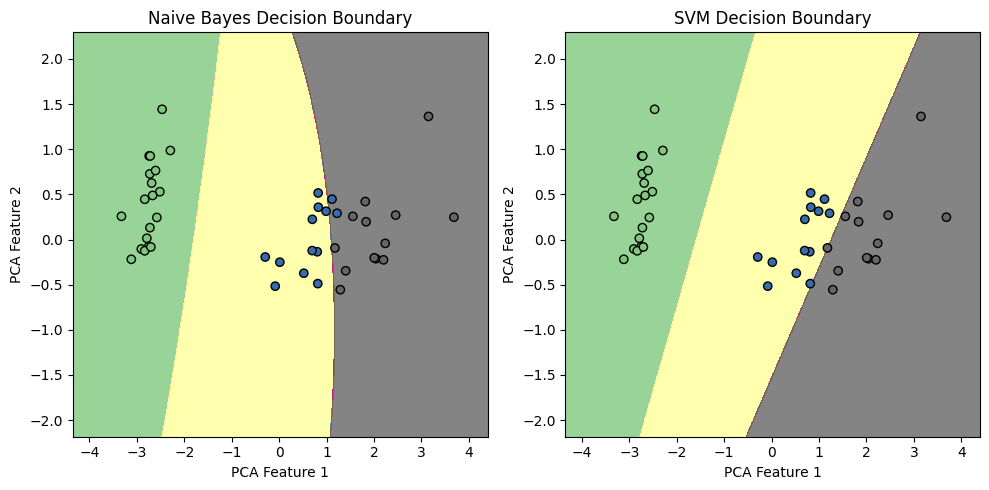

In [3]:
#Decision Boundaries(for 2D data): A plot showing how the models separate the data into different classes.

from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

# Naive Bayes Decision Boundary
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = nb_model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='Accent')
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, edgecolor='k', cmap='Accent')
plt.title("Naive Bayes Decision Boundary")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")

# SVM Decision Boundary
plt.subplot(1, 2, 2)
Z = svm_model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='Accent')
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, edgecolor='k', cmap='Accent')
plt.title("SVM Decision Boundary")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")

plt.tight_layout()
plt.show()


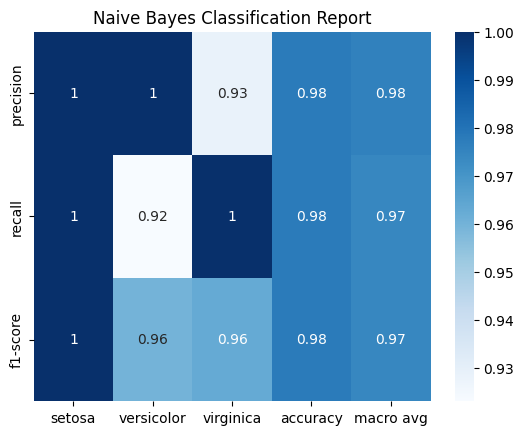

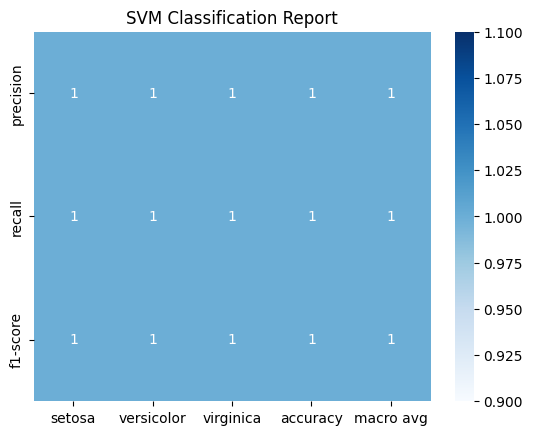

In [4]:
#Classification Report in a Heatmap: to visualize metrics like precision, recall, and F1-score from the classification report.

from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd

# Generate classification report as a heatmap
def plot_classification_report(y_true, y_pred, title):
    report = classification_report(y_true, y_pred, target_names=load_iris().target_names, output_dict=True)
    sns.heatmap(pd.DataFrame(report).iloc[:-1, :-1], annot=True, cmap="Blues")
    plt.title(title)
    plt.show()

# Naive Bayes Classification Report
plot_classification_report(y_test, nb_preds, "Naive Bayes Classification Report")

# SVM Classification Report
plot_classification_report(y_test, svm_preds, "SVM Classification Report")
